# Анализ тенденций на рынке туризма в России (2018-2023)

- Автор: Березинский Вадим Сергеевич
- Дата: 03.06.2025

### Цели и задачи проекта

**Цель исследования:** Провести исследование данных о туризме в России за 2018-2023 годы и проверить гипотезы о соответствии данных о стоимости турпакетов информации из СМИ и о росте рынка внутреннего туризма в 2023 году по сравнению с 2022 годом.

**Задачи:**
1. Провести предобработку данных.
2. Провести исследовательский анализ данных:
    - изучить распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы;
    - определить топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году;
    - графически показать изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год.
3. Проверить гипотезы:
   - проверить, превышает ли средняя стоимость реализованных турпакетов в 2023 году 800 млн рублей:
   - проверить, чаще ли россияне стали ездить по стране и оформлять турпакеты в 2023 году, по сравнению с 2022.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Анализ проводится на основе следующих наборов данных:

1. Таблица `hotel.csv` — число гостиниц, хостелов, санаторно-курортных организаций и мест в них по субъектам Российской Федерации за 2018–2023 годы.

Поля таблицы `hotel.csv`:
- `Субъект` — наименование субъекта Российской Федерации.
- `Число гостиниц`.
- `Число мест в гостиницах`.
- `Число хостелов`.
- `Число мест в хостелах`.
- `Число санаторно-курортных организаций`.
- `Число мест в санаторно-курортных организациях`.
   
2. Таблица `count_person_hotel.csv` — число людей, размещённых в гостиницах по субъектам Российской Федерации в 2023 году.

Поля таблицы `count_person_hotel.csv`:
- `Субъект` — наименование субъекта Российской Федерации.
- `Численность лиц, размещенных в гостиницах в 2023 году`.
- `Численность граждан России, размещенных в гостиницах в 2023 году`.
- `Численность иностранных граждан, размещенных в гостиницах в 2023 году`.

3. Таблица `tour_firm.csv` — число оформленных турпакетов в 2018–2023 годы.

Поля таблицы `tour_firm.csv`:
- `Субъект` — наименование субъекта Российской Федерации;
- `Общее число турпакетов, реализованных населению`.
- `Общее число турпакетов, реализованных гражданам России по территории России`.
- `Общее число турпакетов, реализованных гражданам России по другим странам`.
- `Общее число турпакетов, реализованных гражданам других стран по территории России`.

4. Таблица `tour_cost_2023.csv` — основные показатели деятельности туристических фирм по субъектам Российской Федерации в 2023 году.

Поля таблицы `tour_cost_2023.csv`:
- `Субъект` — наименование субъекта Российской Федерации;
- `Стоимость реализованных турпакетов в 2023 году, млн руб.`.
- `Стоимость турпакетов реализованных гражданам России по территории России в 2023 году, млн руб.`.
- `Стоимость турпакетов реализованных гражданам России по другим странам в 2023 году, млн руб.`.

### Предварительная обработка данных

Загрузим данные из таблиц и познакомимся с ними.

In [118]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеки для статистических расчетов
import scipy.stats as st
import numpy as np

Выгружаем таблицы в датафреймы:

In [120]:
# Поскольку в предоставленных данных в качестве разделителя указан ';', то явно укажем этот разделитель при выгрузке данных:

hotels = pd.read_csv('hotel.csv', sep=';')

In [121]:
persons = pd.read_csv('count_person_hotel.csv', sep=';')

In [122]:
tours = pd.read_csv('tour_firm.csv', sep=';')

In [123]:
tour_cost_2023 = pd.read_csv('tour_cost_2023.csv', sep=';')

**Познакомимся с данными датасета `hotels`, выведем первые строки и общую информацию.**

In [125]:
hotels.head(15)

,Субъект,"Число гостиниц, 2018","Число гостиниц, 2019","Число гостиниц, 2020","Число гостиниц, 2021","Число гостиниц, 2022","Число гостиниц, 2023","Число мест в гостиницах, 2018","Число мест в гостиницах, 2019","Число мест в гостиницах, 2020",...,"Число санаторно-курортных организаций, 2020","Число санаторно-курортных организаций, 2021","Число санаторно-курортных организаций, 2022","Число санаторно-курортных организаций, 2023","Число мест в санаторно-курортных организациях, 2018","Число мест в санаторно-курортных организациях, 2019","Число мест в санаторно-курортных организациях, 2020","Число мест в санаторно-курортных организациях, 2021","Число мест в санаторно-курортных организациях, 2022","Число мест в санаторно-курортных организациях, 2023"
0,Белгородская область,97,101,103,100,101,99,4753,5144,5390,...,11,11,11,11,1969,1938,1969,1969,2212,1999
1,Брянская область,74,78,86,92,91,93,3436,3507,3782,...,14,14,14,13,2953,2829,2430,2837,2672,2937
2,Владимирская область,100,100,114,119,121,125,7679,8059,8815,...,6,8,9,8,1220,1324,1205,1530,1542,1328
3,Воронежская область,141,147,151,163,170,179,9605,10419,10040,...,15,15,14,14,3241,3302,3320,3320,3243,3337
4,Ивановская область,48,52,55,74,64,59,2774,2998,3009,...,14,17,15,15,4347,4341,4485,4616,4396,4293
5,Калужская область,91,96,93,95,91,88,7330,7304,7029,...,10,9,8,8,2364,2368,2368,2170,1986,2029
6,Костромская область,61,56,62,65,61,64,3194,2916,3057,...,12,10,9,11,1909,1909,1889,1701,1641,1899
7,Курская область,66,69,65,61,63,71,3261,3075,2981,...,10,8,8,8,1507,1557,1552,1082,1202,1252
8,Липецкая область,62,61,68,73,69,78,4393,4951,3615,...,5,5,5,5,…1,…1,…1,…1,…1,…1
9,Московская область,301,354,366,437,484,540,35210,41143,40828,...,86,86,87,89,21382,21181,21579,21589,22012,22457


In [126]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Субъект                                              81 non-null     object
 1   Число гостиниц, 2018                                 81 non-null     int64 
 2   Число гостиниц, 2019                                 81 non-null     int64 
 3   Число гостиниц, 2020                                 81 non-null     int64 
 4   Число гостиниц, 2021                                 81 non-null     int64 
 5   Число гостиниц, 2022                                 81 non-null     int64 
 6   Число гостиниц, 2023                                 81 non-null     int64 
 7   Число мест в гостиницах, 2018                        81 non-null     int64 
 8   Число мест в гостиницах, 2019                        81 non-null     int64 
 9   Ч

Мы видим, что таблица `hotels` состоит из 81 строки и 37 столбцов. Строки представляют собой сводные данные по субъектам Российской Федерации, стоит обратить внимание, что на 2018 год в состав России входило 85 субъектов федерации, то есть таблица не содержит данных о четырех регионах. Столбцы представляют собой своные данные по числу средств размещения туристов и числу мест для размещения по таким типам средств размещения как гостиницы, хостелы и санаторно-курортные организации по годам с 2018 по 2023 включительно.

Все столбцы, кроме первого, предназначены для хранения числовых данных о количестве средств размещения и количестве мест, поэтому для них целесообразно использовать целочисленный тип данных. Столбец `Субъект` хранит строковые данные и тип `object` выбран для него корректно.

Заголовки столбцов созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов, в связи с чем для целей анализа удобнее нормализировать заголовки, привести их к стилю `snake_case` например следующим образом:

- `Субъект` - `region`
- `Число гостиниц, 2018` - `hotel_count_2018`
- `Число мест в гостиницах, 2018` - `hotel_beds_count_2018`
- `Число хостелов, 2018` - `hostel_count_2018`
- `Число мест в хостелах, 2018` - `hostel_beds_count_2018`
- `Число санаторно-курортных организаций, 2018` - `sanatorium_count_2018`
- `Число мест в санаторно-курортных организациях, 2018` - `sanatorium_beds_count_2018`

Пропуски в данных отсутствуют. Однако при визуальном осмотре данных мы видим в некоторых ячейках (например, в данных по Липецкой и Орловской областям нечисловые значения `...1`, что может являться нестандартным обозначением пропущенных значений.

Проведем предобработку данных в таблице `hotels`.

In [128]:
# Нормилузуем заголовки столбцов, приведем их к стилю snake_case:

column_names_hotel = ['region','hotel_count_2018','hotel_count_2019','hotel_count_2020','hotel_count_2021','hotel_count_2022','hotel_count_2023','hotel_beds_count_2018','hotel_beds_count_2019','hotel_beds_count_2020','hotel_beds_count_2021','hotel_beds_count_2022','hotel_beds_count_2023','hostel_count_2018','hostel_count_2019','hostel_count_2020','hostel_count_2021','hostel_count_2022','hostel_count_2023','hostel_beds_count_2019','hostel_beds_count_2020','hostel_beds_count_2021','hostel_beds_count_2022','hostel_beds_count_2023','hostel_beds_count_2023','sanatorium_count_2018','sanatorium_count_2019','sanatorium_count_2020','sanatorium_count_2021','sanatorium_count_2022','sanatorium_count_2023','sanatorium_beds_count_2018','sanatorium_beds_count_2019','sanatorium_beds_count_2020','sanatorium_beds_count_2021','sanatorium_beds_count_2022','sanatorium_beds_count_2023']

hotels.columns = column_names_hotel

In [129]:
hotels.columns

Index(['region', 'hotel_count_2018', 'hotel_count_2019', 'hotel_count_2020',
       'hotel_count_2021', 'hotel_count_2022', 'hotel_count_2023',
       'hotel_beds_count_2018', 'hotel_beds_count_2019',
       'hotel_beds_count_2020', 'hotel_beds_count_2021',
       'hotel_beds_count_2022', 'hotel_beds_count_2023', 'hostel_count_2018',
       'hostel_count_2019', 'hostel_count_2020', 'hostel_count_2021',
       'hostel_count_2022', 'hostel_count_2023', 'hostel_beds_count_2019',
       'hostel_beds_count_2020', 'hostel_beds_count_2021',
       'hostel_beds_count_2022', 'hostel_beds_count_2023',
       'hostel_beds_count_2023', 'sanatorium_count_2018',
       'sanatorium_count_2019', 'sanatorium_count_2020',
       'sanatorium_count_2021', 'sanatorium_count_2022',
       'sanatorium_count_2023', 'sanatorium_beds_count_2018',
       'sanatorium_beds_count_2019', 'sanatorium_beds_count_2020',
       'sanatorium_beds_count_2021', 'sanatorium_beds_count_2022',
       'sanatorium_beds_count_202

In [130]:
# Заменим нечисловые значения `...1` являющиеся нестандартным обозначением пропущенных значений на 0 в датафрейме:

hotels=hotels.replace('…1',0)

hotels.fillna(0, inplace=True)

In [147]:
hotels[hotels.select_dtypes(include=['object']).columns.difference(['region'])]=hotels[hotels.select_dtypes(include=['object']).columns.difference(['region'])].apply(pd.to_numeric,errors='coerce',downcast='integer')

In [149]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   region                      81 non-null     object
 1   hotel_count_2018            81 non-null     int64 
 2   hotel_count_2019            81 non-null     int64 
 3   hotel_count_2020            81 non-null     int64 
 4   hotel_count_2021            81 non-null     int64 
 5   hotel_count_2022            81 non-null     int64 
 6   hotel_count_2023            81 non-null     int64 
 7   hotel_beds_count_2018       81 non-null     int64 
 8   hotel_beds_count_2019       81 non-null     int64 
 9   hotel_beds_count_2020       81 non-null     int64 
 10  hotel_beds_count_2021       81 non-null     int64 
 11  hotel_beds_count_2022       81 non-null     int64 
 12  hotel_beds_count_2023       81 non-null     int64 
 13  hostel_count_2018           81 non-null     int64 
 

#### Промежуточный вывод

Итак, таблица `hotels` содержит данные о количестве гостиниц, хостелов, санаторно-курортных организаций и мест в них по субъектам Российской Федерации за 2018–2023 годы.

1. Проведены следующие работы по оптимизации типов данных:
    - поскольку все столбцы, кроме первого, предназначены для хранения числовых данных о количестве средств размещения и количестве мест, они приведены к целочисленному типу с понижением разрядности.
2. Пропуски в датасете обработаны следующим образом:
    - при визуальном осмотре данных в некоторых ячейках выявлены нечисловые значения `…1`, что предположительно является нестандартным обозначением пропущенных значений; указанные значения для целей расчетов заменны на 0.
3. Заголовки столбцов нормализованы путем приведения к стилю `snake_case`, поскольку изначально созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов.

**Познакомимся с данными датасета `persons`, выведем первые строки и общую информацию.**

In [152]:
persons.head()

,Субъект,"Численность лиц, размещенных в гостиницах в 2023 году","Численность граждан России, размещенных в гостиницах в 2023 году","Численность иностранных граждан, размещенных в гостиницах в 2023 году"
0,Белгородская область,180442,177536,2906
1,Брянская область,182217,173980,8237
2,Владимирская область,526768,517456,9312
3,Воронежская область,760489,732562,27927
4,Ивановская область,227632,225030,2602


In [153]:
persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Субъект                                                                82 non-null     object
 1   Численность лиц, размещенных в гостиницах в 2023 году                  82 non-null     int64 
 2   Численность граждан России, размещенных в гостиницах в 2023 году       82 non-null     int64 
 3   Численность иностранных граждан, размещенных в гостиницах в 2023 году  82 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


Мы видим, что таблица `persons` состоит из 82 строк и 4 столбцов. Строки представляют собой сводные данные по субъектам Российской Федерации, стоит обратить внимание, что на 2023 год в состав России (согласно тексту Конституции РФ) входило 89 субъектов федерации, то есть таблица не содержит данных о семи регионах. При этом в таблице `persons` на одну строку больше, чем в таблице `hotels`, что следует учитывать, если возникнет необходимость объединения таблиц. Столбцы представляют собой сводные данные по числу лиц, размещенных в гостиницах в 2023 году, с разбивкой на граждан РФ и иностранцев. Исходя из этого, значения во втором столбце должны равняться сумме значений из третьего и четвертого столбцов.

Все столбцы, кроме первого, предназначены для хранения числовых данных о количестве лиц, размещенных в гостиницах в 2023 году, поэтому целочисленный тип данных выбран корректно. Столбец `Субъект` хранит строковые данные и тип `object` выбран для него корректно.

Заголовки столбцов созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов, в связи с чем для целей анализа удобнее нормализировать заголовки, привести их к стилю `snake_case`, например следующим образом:

- `Субъект` - `region`
- `Численность лиц, размещенных в гостиницах в 2023 году` - `hotel_guest_count_2023`
- `Численность граждан России, размещенных в гостиницах в 2023 году` - `citizen_guest_count_2023`
- `Численность иностранных граждан, размещенных в гостиницах в 2023 году` - `foreigner_guest_count_2023`

Пропуски в данных отсутствуют. 

Проведем предобработку данных в таблице `persons`.

In [155]:
# Нормализуем заголовки столбцов, приведем их к стилю snake_case:

persons.columns = ['region','hotel_guest_count_2023','citizen_guest_count_2023','oreigner_guest_count_2023']

In [156]:
persons.columns

Index(['region', 'hotel_guest_count_2023', 'citizen_guest_count_2023',
       'oreigner_guest_count_2023'],
      dtype='object')

#### Промежуточный вывод

Итак, таблица `persons` содержит данные о число людей, размещённых в гостиницах по субъектам Российской Федерации в 2023 году. Типы данных выбраны корректно, пропуски отсутствуют. Заголовки столбцов нормализованы путем приведения к стилю `snake_case`, поскольку изначально созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов.

**Познакомимся с данными датасета `tour_firms`, выведем первые строки и общую информацию.**

In [159]:
tours.head()

,Субъект,"Общее число турпакетов, реализованных населению, 2018","Общее число турпакетов, реализованных гражданам России по территории России, 2018","Общее число турпакетов, реализованных гражданам России по другим странам, 2018","Общее число турпакетов, реализованных гражданам других стран по территории России, 2018","Общее число турпакетов, реализованных населению, 2019","Общее число турпакетов, реализованных гражданам России по территории России, 2019","Общее число турпакетов, реализованных гражданам России по другим странам, 2019","Общее число турпакетов, реализованных гражданам других стран по территории России, 2019","Общее число турпакетов, реализованных населению, 2020",...,"Общее число турпакетов, реализованных гражданам России по другим странам, 2021","Общее число турпакетов, реализованных гражданам других стран по территории России, 2021","Общее число турпакетов, реализованных населению, 2022","Общее число турпакетов, реализованных гражданам России по территории России, 2022","Общее число турпакетов, реализованных гражданам России по другим странам, 2022","Общее число турпакетов, реализованных гражданам других стран по территории России, 2022","Общее число турпакетов, реализованных населению, 2023","Общее число турпакетов, реализованных гражданам России по территории России, 2023","Общее число турпакетов, реализованных гражданам России по другим странам, 2023","Общее число турпакетов, реализованных гражданам других стран по территории России, 2023"
0,Белгородская область,14138,4333,9805,NaN,20646,4772,15874,NaN,9694,...,9239.0,NaN,15222,8887,6165,170.0,17733,11803,5930.0,NaN
1,Брянская область,9444,4438,5004,2.0,10459,4966,5492,1,3435,...,3479.0,NaN,11591,8265,3326,NaN,10165,5377,4788.0,NaN
2,Владимирская область,23900,12294,11243,363.0,23065,11558,10394,1113,7334,...,6426.0,7,18288,11359,6924,5.0,22334,13588,8737.0,9.0
3,Воронежская область,14554,8124,6430,NaN,14464,4613,9851,NaN,6681,...,7923.0,NaN,20958,13608,7350,NaN,24993,14781,10212.0,NaN
4,Ивановская область,17049,6592,10457,NaN,17019,8327,8692,NaN,6477,...,4445.0,NaN,13637,8575,5062,NaN,18904,11002,7902.0,NaN


In [160]:
tours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Субъект                                                                                  82 non-null     object 
 1   Общее число турпакетов, реализованных населению, 2018                                    82 non-null     object 
 2   Общее число турпакетов, реализованных гражданам России по территории России, 2018        82 non-null     object 
 3   Общее число турпакетов, реализованных гражданам России по другим странам, 2018           81 non-null     object 
 4   Общее число турпакетов, реализованных гражданам других стран по территории России, 2018  62 non-null     float64
 5   Общее число турпакетов, реализованных населению, 2019             

Мы видим, что таблица `tours` состоит из 82 строк и 25 столбцов. Строки представляют собой сводные данные по субъектам Российской Федерации, при этом в таблице `tours` на одну строку больше, чем в таблице `hotels`, что следует учитывать, если возникнет необходимость объединения таблиц. Столбцы представляют собой сводные данные по числу туров, реализованных российскими компаниями-туроператорами в период с 2018 по 2023 годы включительно, с разбивкой на внутренние туры для граждан РФ и иностранцев и зарубежные туры для граждан России. 

Все столбцы, кроме первого, предназначены для хранения числовых данных о количестве средств размещения и количестве мест, поэтому для них целесообразно использовать целочисленный тип данных. Столбец `Субъект` хранит строковые данные и тип `object` выбран для него корректно.

Заголовки столбцов созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов, в связи с чем для целей анализа удобнее нормализировать заголовки, привести их к стилю `snake_case` например следующим образом:

- `Субъект` - `region`
- `Общее число турпакетов, реализованных населению, 2018` - `tours_count_2018`
- `Общее число турпакетов, реализованных гражданам России по территории России, 2018` - `citizen_rf_tours_count_2018`
- `Общее число турпакетов, реализованных гражданам России по другим странам, 2018` - `citizen_overseas_tours_count_2018`
- `Общее число турпакетов, реализованных гражданам других стран по территории России, 2018` - `foreigner_rf_tours_count_2018`

В данных имеются пропуски, самое большое число пропусков в столбцах с количеством турпакетов, реализованных гражданам других стран по территории России. В первую очередь это связано с тем, что далеко не все регионы России посещаются иностраннными туристами. Кроме того, снижение количества туров приобратаемых иносранцами для посещения регионов России к 2023 году связано с эпидемиологическими (пандемия коронавируса в 2020-2021 годы) и внешнеполитическими (вооруженные действия и международные санкции в 2022-2023 годах) факторами. 
 
При визуальном осмотре данных мы видим в некоторых ячейках (например, в данных по Карачаево-Черкесской Республике и Республике Ингушетия нечисловые значения `…1`, что может являться нестандартным обозначением пропущенных значений.

Проведем предобработку данных в таблице `tours`.

In [162]:
# Нормилузем заголовки столбцов, приведем их к стилю snake_case:

tours.columns = ['region','tours_count_2018','citizen_rf_tours_count_2018','citizen_overseas_tours_count_2018','foreigner_rf_tours_count_2018','tours_count_2019','citizen_rf_tours_count_2019','citizen_overseas_tours_count_2019','foreigner_rf_tours_count_2019','tours_count_2020','citizen_rf_tours_count_2020','citizen_overseas_tours_count_2020','foreigner_rf_tours_count_2020','tours_count_2021','citizen_rf_tours_count_2021','citizen_overseas_tours_count_2021','foreigner_rf_tours_count_2021','tours_count_2022','citizen_rf_tours_count_2022','citizen_overseas_tours_count_2022','foreigner_rf_tours_count_2022','tours_count_2023','citizen_rf_tours_count_2023','citizen_overseas_tours_count_2023','foreigner_rf_tours_count_2023']

In [163]:
tours.columns

Index(['region', 'tours_count_2018', 'citizen_rf_tours_count_2018',
       'citizen_overseas_tours_count_2018', 'foreigner_rf_tours_count_2018',
       'tours_count_2019', 'citizen_rf_tours_count_2019',
       'citizen_overseas_tours_count_2019', 'foreigner_rf_tours_count_2019',
       'tours_count_2020', 'citizen_rf_tours_count_2020',
       'citizen_overseas_tours_count_2020', 'foreigner_rf_tours_count_2020',
       'tours_count_2021', 'citizen_rf_tours_count_2021',
       'citizen_overseas_tours_count_2021', 'foreigner_rf_tours_count_2021',
       'tours_count_2022', 'citizen_rf_tours_count_2022',
       'citizen_overseas_tours_count_2022', 'foreigner_rf_tours_count_2022',
       'tours_count_2023', 'citizen_rf_tours_count_2023',
       'citizen_overseas_tours_count_2023', 'foreigner_rf_tours_count_2023'],
      dtype='object')

In [164]:
# Заменим нечисловые значения `…1` являющиеся нестандартным обозначением пропущенных значений на 0 в датафрейме:

tours=tours.replace('…1',0)

In [165]:
# Заменим пустые значения на 0 в датафрейме:

tours.fillna(0, inplace=True)

In [166]:
# Приведем данные во всех столбцах кроме первого к целочисленному типу:

tours[tours.columns[1:]]=tours[tours.columns[1:]].apply(pd.to_numeric,downcast='integer')

In [167]:
tours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   region                             82 non-null     object
 1   tours_count_2018                   82 non-null     int32 
 2   citizen_rf_tours_count_2018        82 non-null     int32 
 3   citizen_overseas_tours_count_2018  82 non-null     int32 
 4   foreigner_rf_tours_count_2018      82 non-null     int32 
 5   tours_count_2019                   82 non-null     int32 
 6   citizen_rf_tours_count_2019        82 non-null     int32 
 7   citizen_overseas_tours_count_2019  82 non-null     int32 
 8   foreigner_rf_tours_count_2019      82 non-null     int32 
 9   tours_count_2020                   82 non-null     int32 
 10  citizen_rf_tours_count_2020        82 non-null     int32 
 11  citizen_overseas_tours_count_2020  82 non-null     int32 
 12  foreigner_

#### Промежуточный вывод

Итак, таблица `tours` содержит данные о количестве оформленных турпакетов в 2018–2023 годы.

1. Проведены следующие работы по оптимизации типов данных:
    - поскольку все столбцы, кроме первого, предназначены для хранения числовых данных о количестве реализованных туров, они приведены к целочисленному типу с понижением разрядности.
2. Пропуски в датасете обработаны следующим образом:
    - при визуальном осмотре данных в некоторых ячейках выявлены нечисловые значения `…1`, что предположительно является нестандартным обозначением пропущенных значений; указанные значения, а также пропуски в данных для целей расчетов заменны на 0.
3. Заголовки столбцов нормализованы путем приведения к стилю `snake_case`, поскольку изначально созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов.

**Познакомимся с данными датасета `tour_cost_2023`, выведем первые строки и общую информацию.**

In [170]:
tour_cost_2023.head()

,Субъект,"Стоимость реализованных турпакетов в 2023 году, млн руб.","Стоимость турпакетов реализованных гражданам России по территории России в 2023 году, млн руб.","Стоимость турпакетов реализованных гражданам России по другим странам в 2023 году, млн руб."
0,Белгородская область,1731.9856000000002,451.745,1280.2406
1,Брянская область,1409.2361,455.8798,953.3563
2,Владимирская область,2619.7022,912.2325,1706.2733999999998
3,Воронежская область,2877.2381,688.3641,2188.874
4,Ивановская область,1906.7206999999999,612.5177,1294.203


In [171]:
tour_cost_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Субъект                                                                                          87 non-null     object
 1   Стоимость реализованных турпакетов в 2023 году, млн руб.                                         87 non-null     object
 2   Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.  87 non-null     object
 3   Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.     87 non-null     object
dtypes: object(4)
memory usage: 2.8+ KB


Мы видим, что таблица `tour_cost_2023` состоит из 87 строк и 4 столбцов. Строки представляют собой сводные данные по субъектам Российской Федерации, стоит обратить внимание, что на 2023 год в состав России (согласно тексту Конституции РФ) входило 89 субъектов федерации, то есть таблица не содержит данных о двух регионах. При этом в таблице `tour_cost_2023` на шесть строк больше, чем в таблице `hotels` и на пять строк больше, чем в таблицах `persons` и `tours`, что следует учитывать, если возникнет необходимость объединения таблиц. Столбцы представляют собой сводные данные выручке от реализации туров гражданам России с разбивкой на внутренний и выездной туризм. Исходя из этого, значения во втором столбце должны равняться сумме значений из третьего и четвертого столбцов.

Все столбцы, кроме первого, предназначены для хранения числовых данных о стоимости турпакетов, поэтому поэтому для них целесообразно использовать вещественный тип данных. Столбец `Субъект` хранит строковые данные и тип `object` выбран для него корректно.

Заголовки столбцов созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов, в связи с чем для целей анализа удобнее нормализировать заголовки, привести их к стилю `snake_case`, например следующим образом:

- `Субъект` - `region`
- `Стоимость реализованных турпакетов в 2023 году, млн руб.` - `tours_cost_2023`
- `Стоимость турпакетов  реализованных гражданам России по территории России в 2023 году, млн руб.` - `rf_tours_cost_2023`
- `Стоимость турпакетов  реализованных гражданам России по другим странам в 2023 году, млн руб.` - `overseas_tours_cost_2023`

Пропуски в данных отсутствуют. 

Проведем предобработку данных в таблице `tour_cost_2023`.

In [173]:
tour_cost_2023.columns = ['region','tours_cost_2023','rf_tours_cost_2023','overseas_tours_cost_2023']

In [174]:
tour_cost_2023.columns

Index(['region', 'tours_cost_2023', 'rf_tours_cost_2023',
       'overseas_tours_cost_2023'],
      dtype='object')

In [175]:
# Заменим нечисловые значения `…1` являющиеся нестандартным обозначением пропущенных значений на 0 в датафрейме:

tour_cost_2023=tour_cost_2023.replace('…1',0)

In [176]:
# Приведем данные во всех столбцах кроме первого к вещественному типу:

tour_cost_2023[tour_cost_2023.columns[1:]]=tour_cost_2023[tour_cost_2023.columns[1:]].astype('float')

In [177]:
tour_cost_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    87 non-null     object 
 1   tours_cost_2023           87 non-null     float64
 2   rf_tours_cost_2023        87 non-null     float64
 3   overseas_tours_cost_2023  87 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.8+ KB


In [178]:
tour_cost_2023.head()

,region,tours_cost_2023,rf_tours_cost_2023,overseas_tours_cost_2023
0,Белгородская область,1731.9856,451.7450,1280.2406
1,Брянская область,1409.2361,455.8798,953.3563
2,Владимирская область,2619.7022,912.2325,1706.2734
3,Воронежская область,2877.2381,688.3641,2188.8740
4,Ивановская область,1906.7207,612.5177,1294.2030


#### Промежуточный вывод

Итак, таблица `tour_cost_2023` содержит данные о стоимости реализованных туров российскими компаниями-туроператорами в 2023 году.

1. Проведены следующие работы по оптимизации типов данных:
    - поскольку все столбцы, кроме первого, предназначены для хранения числовых данных о стоимости реализованных туров, они приведены к вещественному типу.
2. Пропуски в датасете обработаны следующим образом:
    - при визуальном осмотре данных в некоторых ячейках выявлены нечисловые значения `…1`, что предположительно является нестандартным обозначением пропущенных значений; указанные значения для целей расчетов заменны на 0.
3. Заголовки столбцов нормализованы путем приведения к стилю `snake_case`, поскольку изначально созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов.

### Промежуточный вывод по подготовке данных к анализу

Представленные для анализа наборы данных сохранены в датафремы `hotels`,`persons`,`tours`,`tour_cost_2023`.

1. Проведены следующие работы по оптимизации типов данных:
    - поскольку все столбцы, кроме первого, предназначены для хранения числовых данных, то в датафремах `hotels`,`persons`,`tours`они приведены к целочисленному типу с понижением разрядности, а в датафрейме `tour_cost_2023` - к вещественному типу данных.
2. Пропуски в датафреймах обработаны следующим образом:
    - при визуальном осмотре данных в некоторых ячейках выявлены нечисловые значения `…1`, что предположительно является нестандартным обозначением пропущенных значений; указанные значения, а также явно указанные пропуски для целей расчетов заменны на 0.
3. Заголовки столбцов нормализованы путем приведения к стилю `snake_case`, поскольку изначально созданы на кириллице, включают как строчные, так и прописные буквы, пробелы и запятые, содержат большое количество символов.

Также необходимо учитывать, что датафремы `hotels`,`persons`,`tours`,`tour_cost_2023` имеют разное количество строк: 81, 82, 82, 87 соответственно. Поскольку мы имеет дело со сводными таблицами данных по субъекта Российской Федерации (каждая строка содержит данные по отдельному региону), то разное количество регионов в четырех таблицах следует учитывать, если возникнет необходимость объединения таблиц.

## Исследовательский анализ данных

#### Распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы

Изучим распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы. 

In [182]:
# Игнорируем предупреждение:
import warnings
warnings.filterwarnings('ignore')

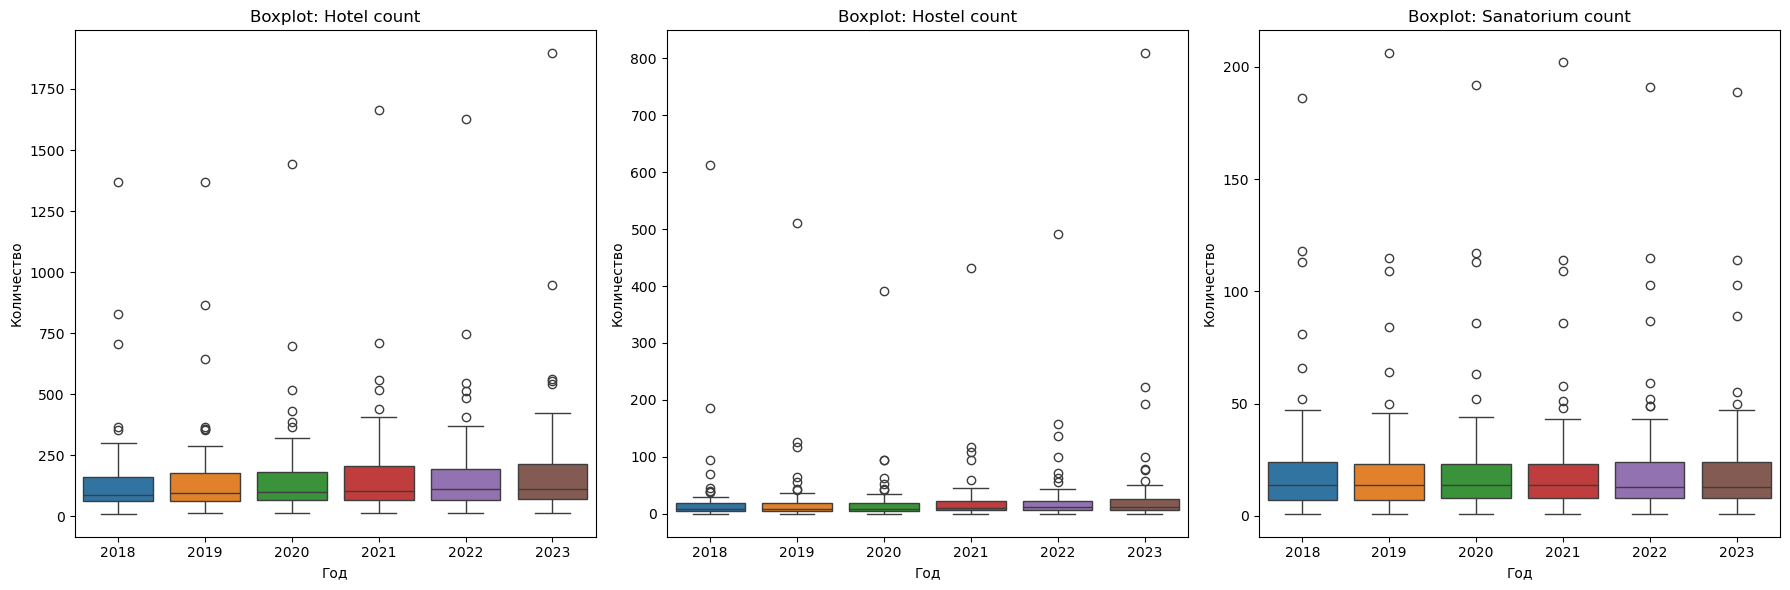

In [183]:
years = range(2018, 2024)

# создаём одну строку (1) и три столбца (3) графиков на одном рисунке (figure).
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Задаем цикл по типам объектов (гостиницы, хостелы, санатории), где idx - номер типа (0,1,2), а col_type - строка с названием типа

for idx, col_type in enumerate(['hotel_count', 'hostel_count', 'sanatorium_count']):

# Задаем переменную data, в которую записываем список из шести столбцов (по одному на каждый год), где каждый столбец — это данные по регионам.
    
    data = [hotels[f'{col_type}_{year}'] for year in years]

# Строим боксплот и указываем в ax=axes[idx], на какой из трёх осей рисовать (0 — гостиницы, 1 — хостелы, 2 — санатории).    
    
    sns.boxplot(data=data, ax=axes[idx])

# Настраиваем подписи для осей Х на каждом графике   
    
    axes[idx].set_xticklabels(years)

# Задаем заголовок для каждого графика
    
    axes[idx].set_title(f'Boxplot: {col_type.replace("_", " ").capitalize()}')

# Подписываем общие оси Х и Y
    
    axes[idx].set_xlabel('Год')
    axes[idx].set_ylabel('Количество')

plt.tight_layout()
plt.show()


In [184]:
# Проверим, какие регионы попадают в выбросы:

hotels[(hotels['hotel_count_2023']>500) | (hotels['hostel_count_2023']>100) | (hotels['sanatorium_count_2023']>50)]

,region,hotel_count_2018,hotel_count_2019,hotel_count_2020,hotel_count_2021,hotel_count_2022,hotel_count_2023,hotel_beds_count_2018,hotel_beds_count_2019,hotel_beds_count_2020,...,sanatorium_count_2020,sanatorium_count_2021,sanatorium_count_2022,sanatorium_count_2023,sanatorium_beds_count_2018,sanatorium_beds_count_2019,sanatorium_beds_count_2020,sanatorium_beds_count_2021,sanatorium_beds_count_2022,sanatorium_beds_count_2023
9,Московская область,301,354,366,437,484,540,35210,41143,40828,...,86,86,87,89,21382,21181,21579,21589,22012,22457
17,г. Москва,827,865,696,708,746,948,134705,138904,115207,...,16,20,24,22,2183,2873,2811,3142,3807,3633
27,г. Санкт-Петербург,706,644,518,557,544,554,71723,67923,68766,...,21,22,24,24,7119,6935,6490,6013,7094,5503
30,Республика Крым,352,365,429,518,514,561,31849,34616,39776,...,113,109,103,103,43885,43592,44151,44054,41950,43410
31,Краснодарский край,1369,1369,1443,1662,1627,1896,151687,149634,165501,...,192,202,191,189,98378,99231,99538,102948,101771,105681
41,Ставропольский край,256,267,264,276,298,321,11520,11702,11727,...,117,114,115,114,31445,31085,30782,31184,32773,32143
42,Республика Башкортостан,207,205,227,239,229,230,11388,11330,11685,...,63,58,59,55,11736,11613,11345,11460,11619,10801


#### Промежуточный вывод

Построив боксплот для всех трех средств размещения (гостиницы, хостелы и санатории) по годам с 2018 по 2023, мы видим, что существуют регионы, в которых количество средств размещения всех рассматриваемых типов значительно превышает показатели остальных регионов. На графике это видно в виде выбросов за пределами "усов" боксплота. В эти регионы попали Москва и Московская область, Санкт-Петербург, Крым, Краснодарский край, Ставропольский край - в целом самые привлекательные с точки зрения туризма регионы России, в связи с чем полученные данные нельзя считать выбросами, а стоит рассматривать как особенность распределения.

#### Топ-10 регионов России с наибольшей стоимостью турпакетов в 2023 году

Определим определим ТОП-10 регионов с самой большой выручкой от реализации турпакетов в 2023 году.

In [187]:
tour_cost_2023.sort_values(by='tours_cost_2023',ascending=False).head(10)

,region,tours_cost_2023,rf_tours_cost_2023,overseas_tours_cost_2023
17,г. Москва,388215.5477,61611.1085,325476.7008
9,Московская область,27151.9902,5059.5491,22081.5946
29,г. Санкт-Петербург,23785.7731,10176.0073,13211.9414
61,Тюменская область,14332.6665,2852.9022,11478.4233
60,Свердловская область,14271.0682,5029.2558,9230.5944
33,Краснодарский край,14250.5485,5754.7161,8464.1645
48,Республика Татарстан,13768.8762,3334.2739,10431.1633
51,Пермский край,12592.6389,5128.5544,7464.0845
53,Нижегородская область,11545.6481,5255.3996,6290.2485
73,Новосибирская область,10433.0335,2031.2164,8399.3291


#### Промежуточный вывод

В ТОП-10 регионов с самой большой выручкой от реализации турпакетов в 2023 году вошли Москва (с большим отрывом), Московская область, Санкт-Петербург, Тюменсая, Свердловская, Нижегородская и Новосибирская области, Краснодарский и Пермский края и Республика Татарстан.

#### Динамика среднего количества турпакетов в России по категориям с 2018 по 2023 год

Построим линейный график, который покажет изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год.
Для этого:
1. Выделим данные по годам с 2018 по 2023 и разделим на категории
2. Вычислим среднее количество турпакетов по всей России для каждой категории и каждого года
3. Вычисления занесем в новый датафрейм
4. Построим линейный график, который покажет изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год

In [190]:
# Задаем список годов
years = [2018, 2019, 2020, 2021, 2022, 2023]

# Задаем категории турпакетов, не учитываем столбцы 'region' и 'tours_count':
categories = ['citizen_rf_tours_count', 'citizen_overseas_tours_count', 'foreigner_rf_tours_count']

# Создаем пустой DataFrame для средних значений
avg_tours = pd.DataFrame(index=years, columns=categories)

# С помощью вложенного цикла заполняем средними значениями по категориям за каждый год
for year in years:
    for cat in categories:
        col_name = f"{cat}_{year}"
        avg_tours.loc[year, cat] = tours[col_name].mean()

avg_tours.head(6)

,citizen_rf_tours_count,citizen_overseas_tours_count,foreigner_rf_tours_count
2018,19935.0,31393.963415,4571.865854
2019,25697.109756,35468.987805,3829.54878
2020,25524.634146,12346.682927,224.54878
2021,34828.182927,23690.853659,149.768293
2022,36970.414634,27259.792683,129.304878
2023,40649.97561,36690.414634,323.682927


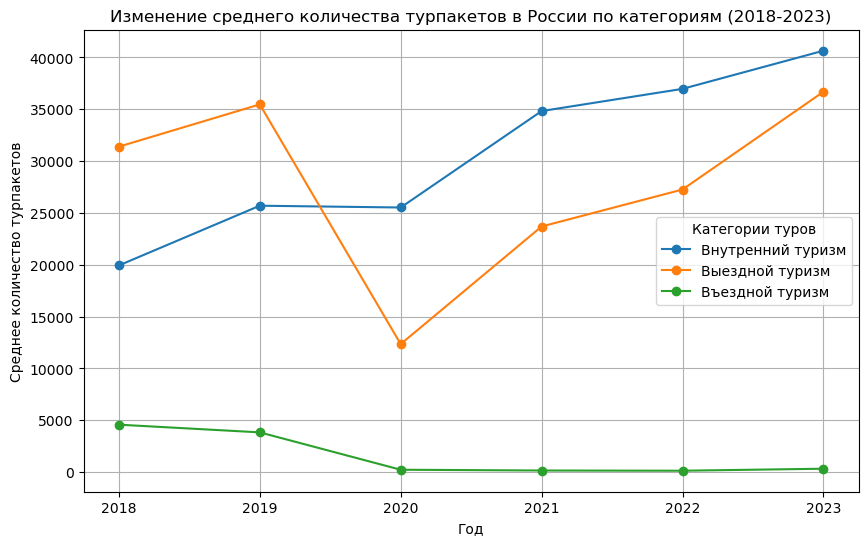

In [191]:
# Строим график:

# Задаем размер фигуры:

plt.figure(figsize=(10,6))

for cat in categories:
    plt.plot(avg_tours.index, avg_tours[cat], marker='o', label=cat)

plt.title('Изменение среднего количества турпакетов в России по категориям (2018-2023)')
plt.xlabel('Год')
plt.ylabel('Среднее количество турпакетов')
plt.legend(['Внутренний туризм','Выездной туризм','Въездной туризм'],title='Категории туров')
plt.grid(True)
plt.show()

#### Промежуточный вывод

Из анализа графика, показывающего изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год, видно, что:
1. Внутренний туризм показывает устойчивую тенденцию роста с 20000 туров в 2018 году до 40000 туров к 2023 году. Можно также отметить замедление в 2020 году на отметке 25000 туров (замедление, вероятно, было вызвано пандемией коронавируса).
2. Выездной туризм, достигнув к 2019 году показателя в 35000 туров, показал резкий спад в 2020 году (вероятно, по причине локдауна в связи с пандемией коронавируса). С 2020 года наметилась тенденция к росту количества проданных туров, однако на "доковиный" уровень в 35000 туров выездной туризм вышел только к 2023 году.
3. Въездной туризм показывает устойчивый спад от 2018 к 2020 году и находится прктически на нулевом уровне вплоть до 2023 года. Отсутствие роста, прдположительно, связано с военными действиями и внешнеэкономическими санкциями.

### Проверка гипотез

### Первая гипотеза

Проверим информацию СМИ, которые утверждают, что средняя стоимость реализованных турпакетов в 2023 году составляет 800 млн рублей.

Действовать будем по алгоритму проверки гипотез:

**1. Определяем тип гипотезы.** Мы предполагаем, что средняя стоимость реализованных турпакетов в 2023 году превышает 800 млн рублей, то есть альтернативная гипотеза является односторонней, а именно - правосторонней, поскольку нас интересует отклонение в большую сторону. Среднюю стоимость реализованных турпакетов в 2023 году определим по столбцу `tours_cost_2023` в датафрейме `tour_cost_2023` (помним, что стоимость в столбце указана в миллионах рублей).

**2. Формулирует нулевую и альтернативную гипотезы.**
Нулевая гипотеза(Н0): средняя стоимость реализованных турпакетов в 2023 году равна 800 млн. рублей.
Альтернативная гипотеза (П1): средняя стоимость реализованных турпакетов в 2023 году превышает 800 млн. рублей.

**3. Выбираем уровень значимости α**
Поскольку ситуация обычная и не требует повышенной осторожности, то выбираем уровень значимости α = 0.05

**4. Выбираем статистический тест для проверки гипотезы.** Поскольку у нас одна выборка (столбец `tours_cost_2023` в датафрейме `tour_cost_2023`) и необходимо проверить отличие от известного значения (сообщения в СМИ), то для этих целей походит одновыборочный t-тест Стьюдента.

In [194]:
# Запишем массив в переменную:

costs = tour_cost_2023['tours_cost_2023']

# Запишем в переменную предполагаемое среднее гипотезы, на равенство которому делаем тест:

expected_mean_cost = 800

# Запишем в переменную выбранное значение уровня значимости:

alpha = 0.05

# Проведем одновыборочный t-тест Стьюдента:

results = st.ttest_1samp(costs,expected_mean_cost,alternative='greater')

# Выведем р-значение:

print('p-значение:',results.pvalue)

# Проверим гипотезу, сравнив р-значение с уровнем значимости:

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.04595368384081744
Отвергаем нулевую гипотезу


#### Промежуточный вывод

Проведя одновыборочный t-тест Стьюдента, мы получили р-значение 0.045, что можно интерпретировать так: если средняя стоимость реализованных турпакетов в 2023 году равна 800 млн. рублей, то вероятность получить такую выборку значений, как представлена в столбце `tours_cost_2023` составляет 4.5%, это ниже заданного уровня значимости, что позволяет нам отвегнуть нулевую гипотезу и утверждать, что средняя стоимость реализованных турпакетов в 2023 году превышает 800 млн. рублей.

### Вторая гипотеза

Проверим утверждение, что в 2023 году, по сравнению с 2022, россияне стали чаще ездить по стране и оформлять турпакеты.

Действовать будем по алгоритму проверки гипотез:

**1. Определяем тип гипотезы.** Мы предполагаем, что общее число турпакетов, реализованных гражданам России по территории России, в 2023 году превысило аналогичный показатель 2022 года, то есть альтернативная гипотеза является односторонней, а именно - правосторонней, поскольку нас интересует отклонение в большую сторону. Общее число турпакетов, реализованных гражданам России по территории России, определим по столбцам `citizen_rf_tours_count_2022` и `citizen_rf_tours_count_2023` в датафрейме `tours`.

**2. Формулирует нулевую и альтернативную гипотезы.**
Нулевая гипотеза(Н0): общее число турпакетов, реализованных гражданам России по территории России, в 2023 году не изменилось по сравнению с аналогичным показателем 2022 года.
Альтернативная гипотеза (П1): общее число турпакетов, реализованных гражданам России по территории России, в 2023 году превысило аналогичный показатель 2022 года.

**3. Выбираем уровень значимости α**
Поскольку ситуация обычная и не требует повышенной осторожности, то выбираем уровень значимости α = 0.05

**4. Выбираем статистический тест для проверки гипотезы.** Поскольку у нас две выборки (первая - столбец  `citizen_rf_tours_count_2022`, вторая  столбец `citizen_rf_tours_count_2023` в датафрейме `tours`) и вариативность данных в обеих выборках можно считать одинаковой (в обеих выборках представлен одинаковый набор регионов страны), то для этих целей походит двухвыборочный t-тест Стьюдента.

In [197]:
# Записываем в переменные наборы данных по двум группам:

group_2022 = tours['citizen_rf_tours_count_2022']
group_2023 = tours['citizen_rf_tours_count_2023']

# Запишем в переменную выбранное значение уровня значимости:

alpha = 0.05

# Проведем двухвыборочный t-тест Стьюдента:

results = st.ttest_ind(group_2022,group_2023,alternative='less')

# Выведем р-значение:

print('p-значение:',results.pvalue)

# Проверим гипотезу, сравнив р-значение с уровнем значимости:

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.43088448306931165
Не получилось отвергнуть нулевую гипотезу


#### Промежуточный вывод

Проведя двухвыборочный t-тест Стьюдента, мы получили р-значение около 43%, что можно интерпретировать так: если общее число турпакетов, реализованных гражданам России по территории России, в 2023 году не изменилось по сравнению с аналогичным показателем 2022 года, то вероятность получить такие выборки значений, как представлена в столбцах `citizen_rf_tours_count_2022` и `citizen_rf_tours_count_2023` составляет примерно 43%, что превышает объевленный нами уровень значимости 5%. Полученный результат не позволяет нам отвегнуть нулевую гипотезу и согласиться с утверждением, что в 2023 году по сравнению с 2022 россияне стали чаще ездить по стране и оформлять турпакеты.

## Итоговый вывод и рекомендации

**1. Общий обзор проделанной работы.**

В ходе исследования был проведен анализ данных о туризме в России за 2018-2023 годы и проверены гипотезы о соответствии данных о стоимости турпакетов информации из СМИ и о росте рынка внутреннего туризма в 2023 году по сравнению с 2022 годом.

**2. Ответы на исследовательские вопросы, или главные выводы.**

1. Изучив распределение количества гостиниц, хостелов и санаторно-курортных организаций за 2018–2023 годы, eстановлено наличие регионов, в которых количество средств размещения всех рассматриваемых типов значительно превышает показатели остальных регионов. В эти регионы попали Москва и Московская область, Санкт-Петербург, Крым, Краснодарский край, Республика Татарстан и Тюменская область - в целом самые привлекательные с точки зрения туризма регионы России, в связи с чем полученные данные нельзя считать выбросами, а стоит рассматривать как особенность распределения.

2. Изучив стоимостью турпакетов в 2023 году, установлено, что в десятку регионов России с самой большой выручкой от реализации турпакетов в 2023 году вошли Москва (с большим отрывом), Московская область, Санкт-Петербург, Тюменсая, Свердловская, Нижегородская и Новосибирская области, Краснодарский и Пермский края и Республика Татарстан.

3. Построив и изучив график, показывающий динамику изменения среднего количества турпакетов в России по категориям с 2018 по 2023 год, установлено, что:

- Внутренний туризм показывает устойчивую тенденцию роста с 20000 туров в 2018 году до 40000 туров к 2023 году. Можно также отметить замедление в 2020 году на отметке 25000 туров (замедление, вероятно, было вызвано пандемией коронавируса).

- Выездной туризм, достигнув к 2019 году показателя в 35000 туров, показал резкий спад в 2020 году (вероятно, по причине локдауна в связи с пандемией коронавируса). С 2020 года наметилась тенденция к росту количества проданных туров, однако на "доковиный" уровень в 35000 туров выездной туризм вышел только к 2023 году.

- Въездной туризм показывает устойчивый спад от 2018 к 2020 году и находится прктически на нулевом уровне вплоть до 2023 года. Отсутствие роста, прдположительно, связано с военными действиями и внешнеэкономическими санкциями.

4. Информация СМИ, утверждающих, что средняя стоимость реализованных турпакетов в 2023 году составила 800 млн рублей., в ходе проведения одновыборочного t-тест Стьюдента была опровергнута. Результаты анализа позволяют утверждать, что средняя стоимость реализованных турпакетов в 2023 году превышает 800 млн. рублей.

5. Утверждение, что в 2023 году по сравнению с 2022 годом россияне стали чаще ездить по стране и оформлять турпакеты, не подтвердилось в ходе двухвыборочного t-теста Стьюдента.

**3. Рекомендации на основе анализа данных.**

В качестве рекомендаций можно отметить следующее:

- В сложившихся экономических условиях стоит обратить внимание на внутренний туризм как самое стабильное направление туризма, показывающее устойчивую тенденцию роста по количеству проданных туров.
- Необходимо учитывать, что инфомация в СМИ о средней стоимости реализованных турпакетов, может оказаться заниженной по сравнению с реальными значениями, что свидетельствует о большем размере рынка внутреннего туризма.